In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

import numpy as np

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


### Performing Exploratory Data Analysis
1) How many features?

2) How many data records?

3) Are there any missing values?

4) What are the target distribution?

In [6]:
#Display concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [7]:
df.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [8]:
# Display dimension of dataset
print(f"Dataset dimensions: {df.shape}\n")

# Display names of each column
print(f"Column names: {list(df.columns)}\n")

# Display types of each column
print(f"Column types:" + '\n' + f"{df.dtypes}\n")

# Display total number of features
print(f"Number of features: {df.shape[-1] - 1}")

Dataset dimensions: (614, 10)

Column names: ['p_id', 'no_times_pregnant', 'glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree', 'age', 'diabetes']

Column types:
p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

Number of features: 9


In [9]:
#Check for missing values
df.isna().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [10]:
#Check for duplicated values
df.duplicated().sum()

0

In [11]:
df['diabetes'].value_counts()

0    400
1    214
Name: diabetes, dtype: int64

# Exploratory Data Analysis Summary before train-test split
1) How many features: 9 - 1 (p_id is used for identification and thus, is not considered as a feature. Therefore, there are only 8 features)

2) How many data records: 614

3) Are there any missing values: No missing or duplicated values. However, an issue of 0 values occurs which will be explained below.

4) What are the target distribution: 400 negative diabetes and 214 positive diabetes records

# Attribute and target explanation
This is a diabetes classification dataset aiming to predict the given person is suffering from diabetes.

## Target
The target is the column diabetes which contains a binary value of 0 and 1.
- 0 represents tested negative for diabetes.
- 1 represents tested positive for diabetes.

## Attributes
1) no_of_times_pregnant: Number of times pregnant

2) glucose_concentration: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3) blood_pressure: Diastolic blood pressure (mm Hg)

4) skin_fold_thickness: Triceps skin fold thickness (mm)

5) serum insulin: 2-Hour serum insulin (mu U/ml)

6) bmi: Body mass index (weight in kg/(height in m)^2)

7) diabetes pedigree: Diabetes pedigree function

8) age: Age (years)

## Misc
1) p_id: Unique identifier (not used for the analysis)


In [12]:
y = df['diabetes']
df = df.drop(columns=['p_id', 'diabetes'])
x = df

In [13]:
x

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27
...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59
610,1,84,64,23,115,36.9,0.471,28
611,2,92,52,0,0,30.1,0.141,22
612,0,125,96,0,0,22.5,0.262,21


In [14]:
(x==0).sum()

no_times_pregnant         90
glucose_concentration      4
blood_pressure            31
skin_fold_thickness      187
serum_insulin            304
bmi                       10
diabetes pedigree          0
age                        0
dtype: int64

## Analysis
Based on the summary statistics of the features, some abnormalities are observed.

The following features contains 0 values which are scientifically impossible:
- glucose_concentration
- blood_pressure
- skin_fold_thickness
- serum_insulin
- bmi

This suggests that 0 may be used as a placeholder value for missing values in this dataset for the following features.

Therefore, these values needs to be addressed to obtain an accuracte representation for the records.

## Treatment plan
- As almost 50% of the serum insulin records are 0 values, this column is dropped as replacing the 0 values with any measure of central tendancy may not be representative of the actual population distribution.
- For the remaining columns, the 0 values will be replaced with a measure of central tendancy (mean/median) from the TRAINING dataset.
- Additionally, measure of central tendancy will take into consideration of the target value.

Example: replacing a 0 value bmi for positive class will use the mean/median of the bmi values for POSITIVE class. Vice versa for negative. This provides a more accurate representation of the feature values as compared to using the entire dataset.

In [15]:
x = x.drop(columns='serum_insulin')

In [16]:
#Performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 7)
(123, 7)
(491,)
(123,)


### Data Preparation: addressing 0 values

In [18]:
xy_train = x_train.copy()
xy_train['target'] = y_train

#Subsetting records based on their target values
xy_train_0 = xy_train[xy_train['target'] == 0]
xy_train_1 = xy_train[xy_train['target'] == 1]

#The testing dataset is treated with the median of the training dataset
xy_test = x_test.copy()
xy_test['target'] = y_test

xy_test_0 = xy_test[xy_test['target'] == 0]
xy_test_1 = xy_test[xy_test['target'] == 1]

In [19]:
#Checking number of missing values in each category
(xy_train_0==0).sum()

no_times_pregnant         47
glucose_concentration      2
blood_pressure            15
skin_fold_thickness       94
bmi                        6
diabetes pedigree          0
age                        0
target                   321
dtype: int64

In [20]:
(xy_train_1==0).sum()

no_times_pregnant        26
glucose_concentration     2
blood_pressure           14
skin_fold_thickness      61
bmi                       2
diabetes pedigree         0
age                       0
target                    0
dtype: int64

In [21]:
(xy_test_0==0).sum()

no_times_pregnant        11
glucose_concentration     0
blood_pressure            2
skin_fold_thickness      21
bmi                       2
diabetes pedigree         0
age                       0
target                   79
dtype: int64

In [22]:
(xy_test_1==0).sum()

no_times_pregnant         6
glucose_concentration     0
blood_pressure            0
skin_fold_thickness      11
bmi                       0
diabetes pedigree         0
age                       0
target                    0
dtype: int64

In [25]:
features = ['glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'bmi']

for feature in features:
    #Training dataset replace class 0 affected features with median
    median_0 = xy_train_0[xy_train_0[feature] != 0][feature].median()
    print(feature, median_0)

    xy_train_0[feature].replace(0, median_0, inplace=True)
    xy_test_0[feature].replace(0, median_0, inplace=True)

    #Training dataset replace class 1 affected features with median
    median_1 = xy_train_1[xy_train_1[feature] != 0][feature].median()
    xy_train_1[feature] = xy_train_1[feature].replace(0, median_1)
    xy_test_1[feature] = xy_test_1[feature].replace(0, median_1)
    print(feature, median_1)

glucose_concentration 106.0
glucose_concentration 143.5
blood_pressure 70.0
blood_pressure 74.0
skin_fold_thickness 28.0
skin_fold_thickness 32.0
bmi 30.0
bmi 33.75


<ipython-input-25-b452213a798c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_train_0[feature].replace(0, median_0, inplace=True)
<ipython-input-25-b452213a798c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_test_0[feature].replace(0, median_0, inplace=True)
<ipython-input-25-b452213a798c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xy_train_1[feature] = xy_trai

In [26]:
xy_train_fix = pd.concat([xy_train_0, xy_train_1], axis=0)
xy_test_fix = pd.concat([xy_test_0, xy_test_1], axis=0)

In [27]:
xy_train_fix.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,bmi,diabetes pedigree,age,target
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,3.800407,120.741344,72.181263,29.515275,32.376986,0.453925,33.258656,0.346232
std,3.316760,30.116768,11.930656,8.636023,6.851644,0.316414,11.923921,0.476254
min,0.000000,57.000000,24.000000,7.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,26.000000,27.550000,0.246500,24.000000,0.000000
50%,3.000000,116.000000,72.000000,28.000000,32.000000,0.356000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,36.500000,0.587500,41.000000,1.000000
max,17.000000,197.000000,114.000000,63.000000,59.400000,2.420000,81.000000,1.000000


In [28]:
xy_test_fix.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,bmi,diabetes pedigree,age,target
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,4.065041,123.804878,73.227642,28.146341,32.545528,0.515911,33.593496,0.357724
std,3.524481,28.096339,12.483309,8.348636,7.013573,0.381562,11.997156,0.481291
min,0.000000,44.000000,44.000000,7.000000,19.600000,0.078000,21.000000,0.000000
25%,1.000000,106.500000,64.000000,23.000000,27.200000,0.219000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,28.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,138.000000,82.000000,32.000000,37.950000,0.728000,41.000000,1.000000
max,14.000000,187.000000,110.000000,52.000000,48.800000,1.893000,69.000000,1.000000


The 0 values from 'glucose_concentration', 'blood_pressure', 'skin_fold_thickness', 'bmi' are addressed.

### Data Visualization on the training dataset

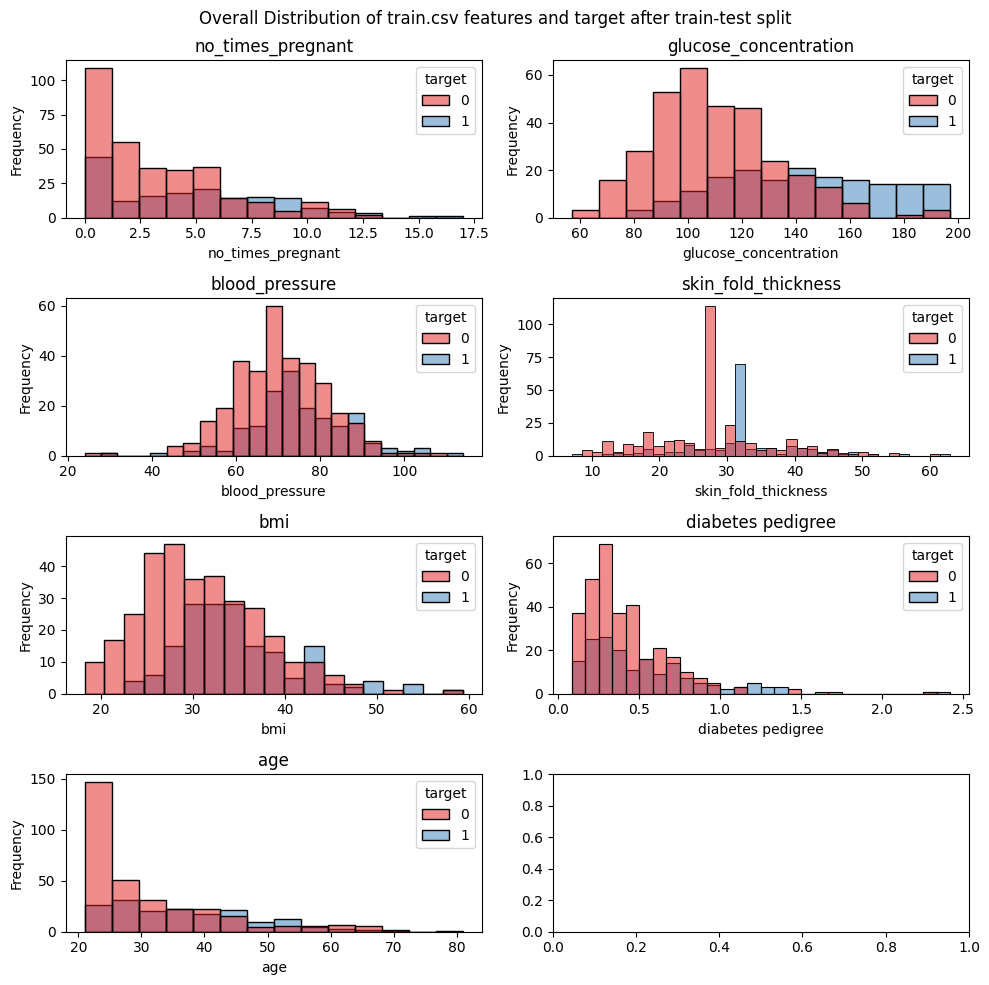

In [29]:
#Visualization plot of training dataset
custom_palette = sns.color_palette("Set1", n_colors=len(xy_train_fix['target'].unique()))
features = xy_train_fix.columns.tolist()[:-1] #exclude target
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes=axes.ravel()

for i, feature in enumerate(features):
    sns.histplot(data=xy_train_fix, x=feature, hue='target', ax=axes[i], palette=custom_palette, alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{feature}')

plt.suptitle('Overall Distribution of train.csv features and target after train-test split')
plt.tight_layout()
plt.show()

### Decision Tree Modelling

In [30]:
new_y_train = xy_train_fix['target']
new_x_train = xy_train_fix.drop(columns='target')

new_y_test = xy_test_fix['target']
new_x_test = xy_test_fix.drop(columns='target')

In [31]:
print(new_x_train.shape)
print(new_x_test.shape)
print(new_y_train.shape)
print(new_y_test.shape)

(491, 7)
(123, 7)
(491,)
(123,)


In [57]:
#Baseline model
dt = DecisionTreeClassifier(random_state=1, criterion = 'entropy')
dt.fit(new_x_train, new_y_train)
print("score: ", dt.score(new_x_test, new_y_test))

score:  0.7560975609756098


In [33]:
#In the training dataset, the tree grew to the maximum depth to perfectly classify every record.
#This may result in overfitting issues, therefore, the tree depth must be optimized.
dt.score(new_x_train, new_y_train)

1.0

In [34]:
#Get an approximate depth for optimization
dt.get_depth()

11

In [35]:
#Tree depth optimization
#Create a validation set based on the training dataset
x_train1, x_val, y_train1, y_val = train_test_split(new_x_train, new_y_train, test_size = 0.2, random_state=1)

In [36]:
score = [] #store the test data scores
score1 = [] #store the train data scores

#Optimizing the depth using the validation dataset.
for depth in range(6,18,2):
    dt = DecisionTreeClassifier(max_depth = depth, random_state=1)
    dt.fit(x_train1, y_train1)
    score.append(dt.score(x_val, y_val)) #testing accuracy
    score1.append(dt.score(x_train1, y_train1)) #training accuracy

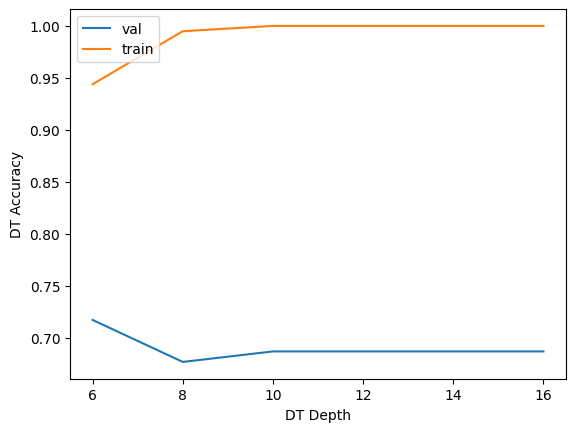

In [37]:
plt.plot(list(range(6,18,2)), score)
plt.plot(list(range(6,18,2)), score1)
plt.xlabel('DT Depth')
plt.ylabel('DT Accuracy')
plt.legend(['val', 'train'], loc='upper left')
plt.show()

In [38]:
print ("Val_train :",x_train1.shape)
print ("Val : ",x_val.shape)

Val_train : (392, 7)
Val :  (99, 7)


In [56]:
np.argmax(score) #the index which maximizes the validation accuracy
a = list(range(6,18,2))
print (f"Optimal tree depth: {a[np.argmax(score)]}")

Optimal tree depth: 6


In [40]:
#Optimized DT
dt2= DecisionTreeClassifier(max_depth=a[np.argmax(score)], random_state=1, criterion = 'entropy')
dt2.fit(new_x_train,new_y_train) #including both training and validation data
print("score :",dt2.score(new_x_test,new_y_test))

score : 0.8048780487804879


Depth of tree: 6
Numer of leaves: 38


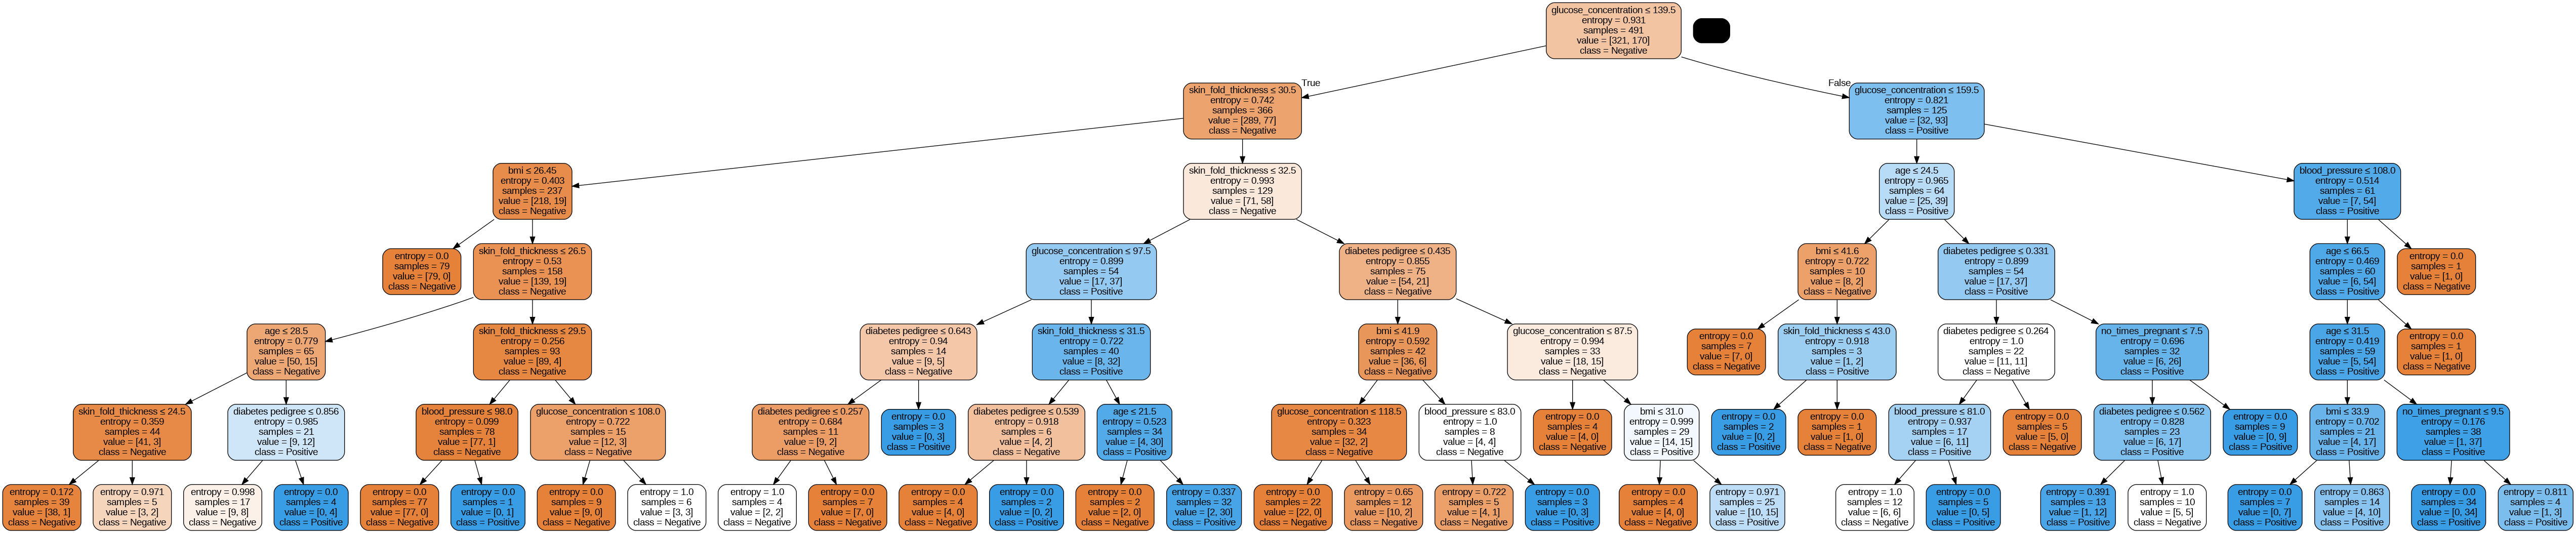

In [41]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

print(f"Depth of tree: {dt2.get_depth()}")
print(f"Numer of leaves: {dt2.get_n_leaves()}")

dot_data = StringIO()
export_graphviz(dt2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = list(new_x_train.columns),
                class_names=['Negative','Positive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('DT1.png')
Image(graph.create_png())

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        79
           1       0.66      0.66      0.66        44

    accuracy                           0.76       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.76      0.76      0.76       123



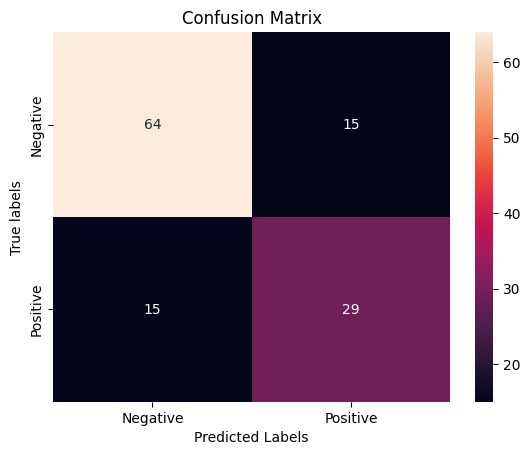

In [63]:
#Predicting the target values with the testing dataset
y_pred1 = dt.predict(new_x_test)
#Plotting classification report and cm of actual value vs predicted value
cr1 = classification_report(new_y_test,y_pred1)
cm1 = confusion_matrix(new_y_test, y_pred1)
print (cr1)

ax= plt.subplot()

sns.heatmap(cm1, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        79
           1       0.74      0.70      0.72        44

    accuracy                           0.80       123
   macro avg       0.79      0.78      0.79       123
weighted avg       0.80      0.80      0.80       123



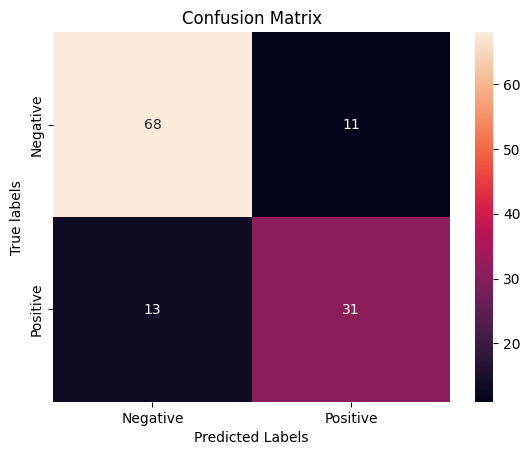

In [43]:
#Predicting the target values with the testing dataset
y_pred2 = dt2.predict(new_x_test)
#Plotting classification report and cm of actual value vs predicted value
cr2 = classification_report(new_y_test,y_pred2)
cm2 = confusion_matrix(new_y_test, y_pred2)
print (cr2)

ax= plt.subplot()

sns.heatmap(cm2, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);

# Support Vector Machine

In [44]:
new_x_train

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,bmi,diabetes pedigree,age
291,1,97.0,70,15,18.2,0.147,21
507,5,155.0,84,44,38.7,0.619,34
328,2,90.0,60,28,23.5,0.191,25
40,1,81.0,72,18,26.6,0.283,24
5,4,114.0,65,28,21.9,0.432,37
...,...,...,...,...,...,...,...
468,0,131.0,88,32,31.6,0.743,32
254,3,173.0,78,39,33.8,0.970,31
281,9,119.0,80,35,29.0,0.263,29
144,1,172.0,68,49,42.4,0.702,28


In [45]:
new_y_train

291    0
507    0
328    0
40     0
5      0
      ..
468    1
254    1
281    1
144    1
72     1
Name: target, Length: 491, dtype: int64

In [46]:
#Unoptimized SVM
svm = svm.SVC(random_state=50)
svm.fit(new_x_train, new_y_train)
svm_pred = svm.predict(new_x_test)

SVM classifier (Without hyperparameter optimization)
Accuracy : 0.73

Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        79
           1       0.70      0.43      0.54        44

    accuracy                           0.73       123
   macro avg       0.72      0.67      0.67       123
weighted avg       0.73      0.73      0.71       123




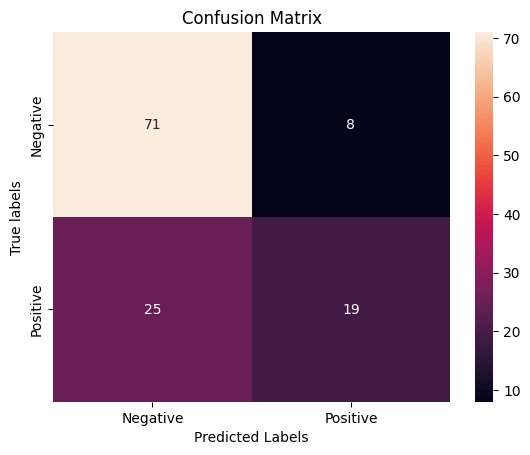

In [47]:
# Classification metrics report
print("SVM classifier (Without hyperparameter optimization)")
print(f"Accuracy : {svm.score(new_x_test,new_y_test):.2f}\n")
cr3 = classification_report(new_y_test, svm_pred)

print(f"Classification Report :\n {cr3}\n")

cm3 = confusion_matrix(new_y_test, svm_pred, labels=svm.classes_)

ax= plt.subplot()

sns.heatmap(cm3, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);

In [50]:
#Optimizing C value
best_accuracy = 0
best_params = {}

c_values = [100, 10, 1, 0.1, 0.01, 0.001]
g_values = ['auto', 'scale', 0.01, 0.001, 0.0001]
for c in c_values:
    for g in g_values:
        svm2 = svm.SVC(C=c, gamma=g, random_state=50)
        svm2.fit(new_x_train, new_y_train)
        svm_pred2 = svm2.predict(new_x_test)
        accuracy = accuracy_score(new_y_test, svm_pred2)

        # print(f"Parameters: C={c}, gamma = {g}")
        # print(f"Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'C': c, 'gamma': g}

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'C': 100, 'gamma': 0.001}
Best Accuracy: 0.7886178861788617


SVM classifier hyperparameter optimized
Accuracy : 0.79

Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        79
           1       0.72      0.66      0.69        44

    accuracy                           0.79       123
   macro avg       0.77      0.76      0.76       123
weighted avg       0.79      0.79      0.79       123




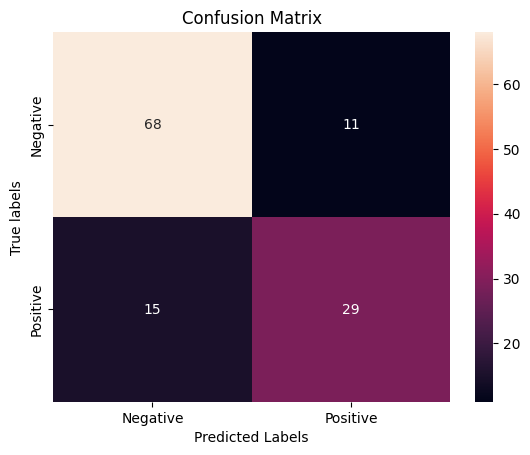

In [51]:
#Optimized SVM
op_svm = svm.SVC(C=100, gamma=0.001, random_state=50)
op_svm.fit(new_x_train, new_y_train)

#Predicting using optimized SVM
svm_pred3 = op_svm.predict(new_x_test)

accuracy = accuracy_score(new_y_test, svm_pred3)

print("SVM classifier hyperparameter optimized")
print(f"Accuracy : {accuracy:.2f}\n")

cr4 = classification_report(new_y_test, svm_pred3)
print(f"Classification Report :\n {cr4}\n")

cm4 = confusion_matrix(new_y_test, svm_pred3, labels=op_svm.classes_)

ax= plt.subplot()

sns.heatmap(cm4, annot=True, ax=ax);
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);

### Comparing the performance of decistion tree and SVM classifiers
- Unoptimized DT
- Optimized DT
- Unoptimized SVM
- Optimized SVM

Unoptimized DT
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        79
           1       0.66      0.66      0.66        44

    accuracy                           0.76       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.76      0.76      0.76       123



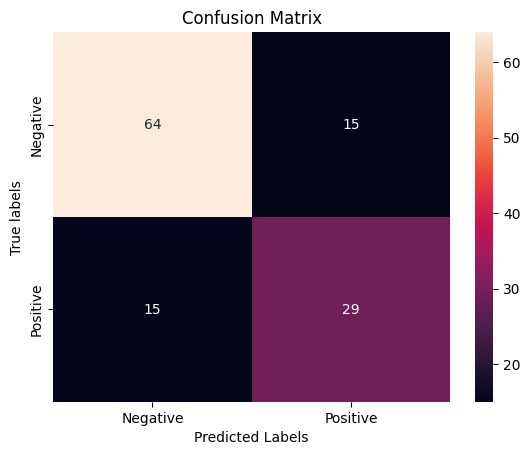

Optimized DT
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        79
           1       0.74      0.70      0.72        44

    accuracy                           0.80       123
   macro avg       0.79      0.78      0.79       123
weighted avg       0.80      0.80      0.80       123



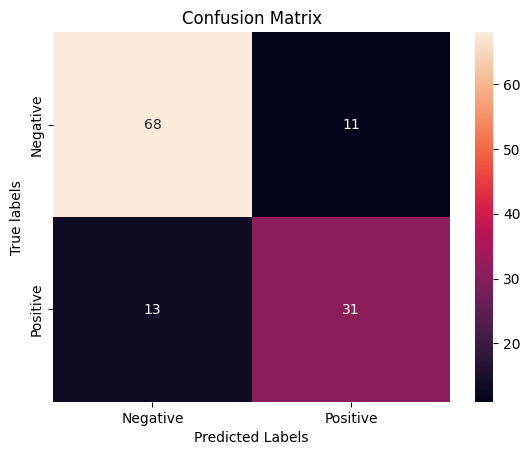

Unoptimized SVM
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        79
           1       0.70      0.43      0.54        44

    accuracy                           0.73       123
   macro avg       0.72      0.67      0.67       123
weighted avg       0.73      0.73      0.71       123



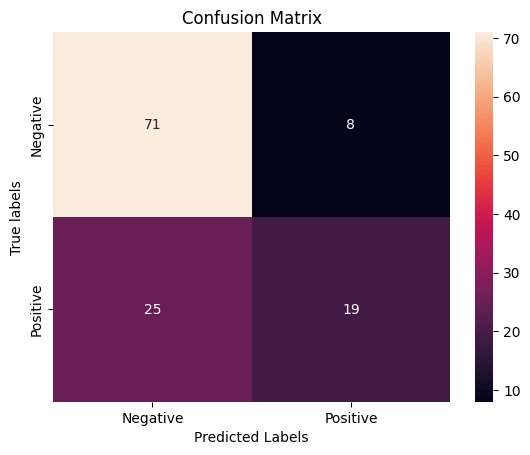

Optimized SVM
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        79
           1       0.72      0.66      0.69        44

    accuracy                           0.79       123
   macro avg       0.77      0.76      0.76       123
weighted avg       0.79      0.79      0.79       123



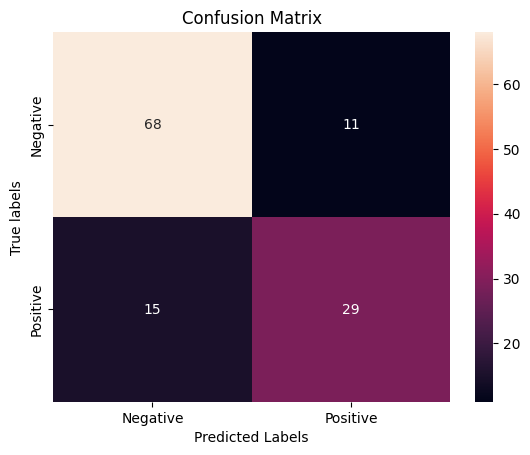

In [64]:
print('Unoptimized DT')
print (cr1)
ax= plt.subplot()

sns.heatmap(cm1, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);
plt.show()

print('Optimized DT')
print (cr2)

ax= plt.subplot()

sns.heatmap(cm2, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);
plt.show()

print('Unoptimized SVM')
print (cr3)

ax= plt.subplot()

sns.heatmap(cm3, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);
plt.show()

print('Optimized SVM')
print (cr4)

ax= plt.subplot()

sns.heatmap(cm4, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["Negative","Positive"]); ax.yaxis.set_ticklabels(["Negative","Positive"]);
plt.show()

### Decision Tree Comparison
By optimizing the depth of the decision tree
- the overall accuracy improved by approximately 4% (76% > 80%)
- Negative precision improved by 3% (81% > 84%), Positive precision improved by 8% (66% > 74%)
- Negative recall improved by 5% (81% > 86%), Positive recall improved by 4% (66% > 70%)
- Negative F1 score improved by 4% (81% > 85%), Positive F1 score improved by 6% (66% > 72%)

For decision tree, the optimized tree is the champion model by outperforming in every aspect compared to the unoptimized tree in predicting diabetes.

### Support Vector Machine Comparison
By optimizing the C and gamma of the support vector machine
- the overall accuracy improved by approximately 6% (73% > 79%)
- Negative precision improved by 8% (74% > 82%), Positive precision improved by 2% (70% > 72%)
- Negative recall deproved by 4% (90% > 86%), Positive recall improved by 23% (43% > 66%)
- Negative F1 score improved by 3% (81% > 84%), Positive F1 score improved by 15% (54% > 69%)

For support vector machine, the optimized SVM is the champion model by only underperforming in the negative recall aspect compared to the unoptimized SVM.

### Decision Tree vs Support Vector Machine
- In terms of overall accuracy, the decision tree marginally outperforms the support vector machine by 1%.
- The DT outperforms the SVM for negative and positive precision by 2% (84% vs 82%) and (74% vs 72%)
- The DT performs equal with the SVM for negative recall (86% vs 86%) and outperforms the SVM for positive recall (70% vs 66%).
- The DT outperforms the SVM for negative and positive F1-score (85% vs 84%) and (72% vs 69%)

This implies that the DT outperforms the SVM in all aspects for these 2 models and suggests that:
- For precision, the measurement of true positive/(true positive + false positive), the DT did better at labelling positive records that are actually positive and vice versa.
- For recall, the measurement of true positive/(true positive + false negative), the DT did better at correctly identifying relevant positive instances in the dataset and vice versa.
- Thus, illustrated in the harmonic mean of precision and recall, the DT have better performance

Therefore, the overall champion model is the optimized decision tree.

### Implications
However, the model should not be deployed as its performance is still insufficient in the medical context. A misclassification of a positive diabetic patient as non-diabetic (False Negative) can result in serious consequences. Therefore, a model with a higher recall value for positive diabetic is preferred.